In [88]:
import intake
import xarray as xr
import regionmask
import matplotlib.pyplot as plt
from xmip.preprocessing import combined_preprocessing
import numpy as np
import dask
from matplotlib import pyplot, transforms
import matplotlib.pylab as plt
from xmip.regionmask import merged_mask

In [89]:
col_url = "/pool/data/Catalogs/dkrz_cmip6_disk.json"


In [90]:
%time col = intake.open_esm_datastore(col_url)

/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/intake_esm/utils.py:96: DtypeWarning: Columns (21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(catalog_path, **csv_kwargs), catalog_path


CPU times: user 1min 5s, sys: 3.06 s, total: 1min 9s
Wall time: 1min 9s


#### Accessing data as pandas table

In [39]:
# col_url = "https://raw.githubusercontent.com/NCAR/intake-esm-datastore/master/catalogs/pangeo-cmip6.json"
col = intake.open_esm_datastore(col_url)
cat = col.search(source_id=[
    # 'CAMS-CSM1-0', 
                            'CMCC-CM2-HR4', 
                            # 'CMCC-CM2-SR5', 
                            # 'CMCC-ESM2', 'ACCESS-ESM1-5', 
                            # 'ACCESS-CM2', 'E3SM-1-0', 'E3SM-1-1', 
                            # 'E3SM-1-1-ECA', 'EC-Earth3', 
                            # 'EC-Earth3-AerChem',
                           ],
                 experiment_id='historical', variable_id='areacello', )

cat
with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    data_dict = cat.to_dataset_dict(cdf_kwargs={"chunks": {"time": -1}, "use_cftime": True},
                                preprocess=combined_preprocessing)

/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/intake_esm/utils.py:96: DtypeWarning: Columns (21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(catalog_path, **csv_kwargs), catalog_path



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.source_id.experiment_id.table_id.grid_label'


In [91]:
query = col.search(member_id='r1i1p1f1',
                 experiment_id='historical',
                 activity_id='CMIP',
                 table_id='Omon',
                 variable_id='tos',
                 grid_label='gn',
                 source_id='CESM2')


In [92]:
dsets = query.to_dataset_dict()

dsets
ds = dsets['CMIP.CESM2.historical.Omon.gn']

ds


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.source_id.experiment_id.table_id.grid_label'


/home/b/b381990/.local/lib/python3.9/site-packages/xarray/conventions.py:516: SerializationWarning: variable 'tos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


<xarray.Dataset>
Dimensions:    (member_id: 1, time: 1980, nlat: 384, nlon: 320, d2: 2,
                vertices: 4)
Coordinates:
    lat        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    lon        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * nlat       (nlat) int32 1 2 3 4 5 6 7 8 ... 377 378 379 380 381 382 383 384
  * nlon       (nlon) int32 1 2 3 4 5 6 7 8 ... 313 314 315 316 317 318 319 320
  * time       (time) object 1850-01-15 13:00:00.000007 ... 2014-12-15 12:00:00
  * member_id  (member_id) <U8 'r1i1p1f1'
Dimensions without coordinates: d2, vertices
Data variables:
    tos        (member_id, time, nlat, nlon) float32 dask.array<chunksize=(1, 1980, 384, 320), meta=np.ndarray>
    time_bnds  (time, d2) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    lat_bnds   (nlat, nlon, vertices) float32 dask.array<chunksize=(384, 320, 4), meta=np.ndarray>
    lon_bnds   (nlat, nlon, vertices) float32 dask.array<chunksize=(384, 320, 4), meta=np.ndarray>
Attributes: (12/47)
    Conventions:             CF-1.7 CMIP-6.2
    activity_id:             CMIP
    case_id:                 15
    cesm_casename:           b.e21.BHIST.f09_g17.CMIP6-historical.001
    contact:                 cesm_cmip6@ucar.edu
    creation_date:           2019-01-16T21:31:39Z
    ...                      ...
    branch_time_in_parent:   219000.0
    branch_time_in_child:    674885.0
    branch_method:           standard
    further_info_url:        https://furtherinfo.es-doc.org/CMIP6.NCAR.CESM2....
    intake_esm_varname:      ['tos']
    intake_esm_dataset_key:  CMIP.CESM2.historical.Omon.gn

In [93]:
# load into memory
ds = ds.squeeze().load()

In [94]:
query = col.search(member_id='r1i1p1f1',
                 experiment_id='historical',
                 activity_id='CMIP',
                 table_id='Ofx',
                 variable_id='areacello',
                 grid_label='gn',
                 source_id='CESM2')

In [107]:
dsets = query.to_dataset_dict()
area = dsets['CMIP.CESM2.historical.Ofx.gn']

area = area.rename({'nlat': 'nj', 'nlon': 'ni'})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.source_id.experiment_id.table_id.grid_label'


/home/b/b381990/.local/lib/python3.9/site-packages/xarray/conventions.py:516: SerializationWarning: variable 'areacello' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [96]:
timeslice = ds['tos'].sel(time=slice('1990', '2000')).groupby('time.season').mean('time')

In [108]:
areacello = area['areacello'].squeeze()

In [ ]:
tos = ds['tos'].squeeze()
tos.isel(time=0).plot()

# Grab north of the equator
arctic_tos = tos.where(area.lat > 0 and area < 0)
# arctic_tos.isel(time=0).plot()

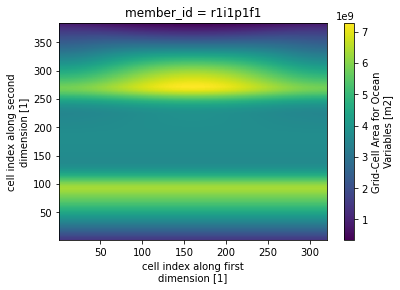

In [109]:
areacello.plot()

In [112]:
areacello = areacello.where(tos.notnull())
areacello.plot()

MemoryError: Unable to allocate 109. TiB for an array with shape (384, 320, 1980, 384, 320) and data type float32

In [ ]:
# compute area-weighted mean
aw_arctic_tos = (arctic_tos * areacello).sum() / areacello.sum()

In [ ]:
aw_arctic_tos = aw_arctic_tos.compute()

In [ ]:
aw_arctic_tos.groupby('time.year').mean('time').plot()
